In [1]:
require(data.table)
require(ggplot2)
require(magrittr)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: magrittr



In [2]:
raw200 <- fread("/extra/iohk/peras-design.conformance/peras-markov/margin-reach-200.tsv")

In [3]:
raw200 %>% summary

      Slot          Margin            Reach          Probability       
 Min.   :   1   Min.   :-303.00   Min.   : 0.0000   Min.   :0.0000000  
 1st Qu.:1052   1st Qu.:-153.00   1st Qu.: 0.0000   1st Qu.:0.0000004  
 Median :1594   Median : -87.00   Median : 1.0000   Median :0.0000545  
 Mean   :1505   Mean   : -99.45   Mean   : 0.8901   Mean   :0.0028118  
 3rd Qu.:2027   3rd Qu.: -36.00   3rd Qu.: 1.0000   3rd Qu.:0.0012497  
 Max.   :2400   Max.   :  11.00   Max.   :16.0000   Max.   :0.9500000  

In [4]:
raw225 <- fread("/extra/iohk/peras-design.conformance/peras-markov/margin-reach-225.tsv")

In [5]:
raw225 %>% summary

      Slot          Margin            Reach         Probability       
 Min.   :   1   Min.   :-293.00   Min.   : 0.000   Min.   :0.0000000  
 1st Qu.:1049   1st Qu.:-146.00   1st Qu.: 0.000   1st Qu.:0.0000005  
 Median :1591   Median : -81.00   Median : 1.000   Median :0.0002391  
 Mean   :1503   Mean   : -93.45   Mean   : 1.192   Mean   :0.0027990  
 3rd Qu.:2025   3rd Qu.: -31.00   3rd Qu.: 1.000   3rd Qu.:0.0035740  
 Max.   :2400   Max.   :  11.00   Max.   :19.000   Max.   :0.9500000  

In [6]:
results <- rbind(
    raw200[Probability > 0, .(`Adversary`="20.0% Adversary", `Slot`, `Margin`, `Reach`, `Probability`)],
    raw225[Probability > 0, .(`Adversary`="22.5% Adversary", `Slot`, `Margin`, `Reach`, `Probability`)]
)

In [7]:
results %>% summary

  Adversary              Slot          Margin            Reach       
 Length:1710985     Min.   :   1   Min.   :-303.00   Min.   : 0.000  
 Class :character   1st Qu.:1050   1st Qu.:-149.00   1st Qu.: 0.000  
 Mode  :character   Median :1593   Median : -84.00   Median : 1.000  
                    Mean   :1504   Mean   : -96.44   Mean   : 1.041  
                    3rd Qu.:2026   3rd Qu.: -33.00   3rd Qu.: 1.000  
                    Max.   :2400   Max.   :  11.00   Max.   :19.000  
  Probability       
 Min.   :0.0000000  
 1st Qu.:0.0000004  
 Median :0.0001348  
 Mean   :0.0028054  
 3rd Qu.:0.0012964  
 Max.   :0.9500000  

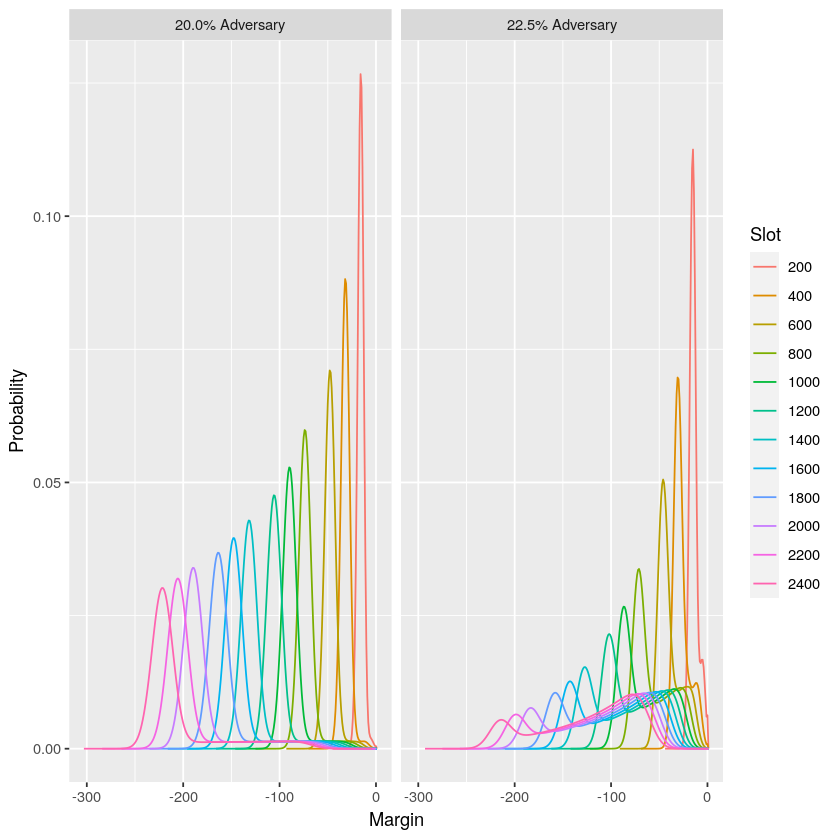

In [8]:
ggplot(
    results[`Slot` %in% (1:12*200), .(`Probability`=sum(`Probability`)), by=.(`Slot`=factor(`Slot`), `Margin`, `Adversary`)],
    aes(x=`Margin`, y=`Probability`, color=`Slot`)
) +
  geom_line() +
  facet_wrap(`Adversary` ~ .)

In [9]:
ggsave(file="margins.png", width=8, height=6, units="in", dpi=150)

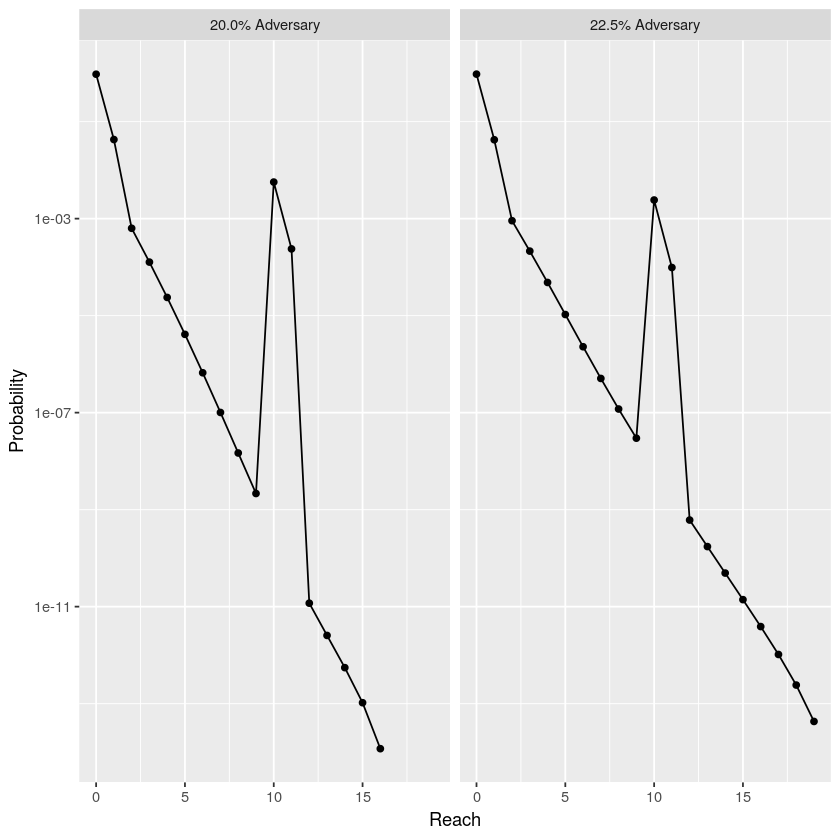

In [10]:
ggplot(results[, .(`Probability`=sum(`Probability`)/2400), by=.(`Reach`, `Adversary`)], aes(x=`Reach`, y=`Probability`)) +
# geom_bar(stat="identity") +
  geom_point() +
  geom_line() +
  scale_y_log10() +
  facet_wrap(`Adversary` ~ .)

In [12]:
ggsave(file="reaches.png", width=8, height=6, units="in", dpi=150)